In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import grader
%matplotlib inline  
matplotlib.rcParams.update({'font.size': 16})

Using grader version: 1.1


# 1: Linear Regression

In this notebook we will generate data from a linear function:  $\textbf{y}=\textbf{X}\beta+\epsilon$ and then solve for $\hat\beta$ using OLS (ordinary least squares) and gradient descent.

## Question 1.1 : Generate data: $\textbf{y}=\textbf{X}\beta+\epsilon$
Here we assume $y\approx g(X,\beta)=\textbf{X}\beta+\epsilon$ where $g$ is linear in $\beta$ with additive noise $\epsilon$

Your function should have the following properties:
* output `y` as an np.array with shape (`M`,`1`)
* `generate_linear_y` should work for any arbitrary `x`, `b`, and `eps`, as long as they are the appropriate dimensions
* do not use for-loops to calculate each `y[i]` separately, as this will be very slow for large `M` and `N`.  Instead, you should leverage [numpy linear algebra](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html).

In [5]:
def generate_linear_y(X,b):
    """ Write a function that generates m data points from inputs X and b
    
    Parameters
    ----------
    X :   numpy.ndarray
          x.shape must be (M,N)
          Each row of `X` is a single data point of dimension N
          Therefore `X` represents M data points
        
    b :   numpy.ndarray
          b.shape must be (N,1)
          Each element of `b` is a value of beta such that b=[[b1][b2]...[bN]]

          
    Returns
    -------
    y :   numpy.ndarray
          y.shape = (M,1)
          y[i] = X[i]b
    """
    
    # STUDENT CODE GOES HERE
    return np.dot(X, b)
    

In [6]:
# execute this cell to grade your work

from grader import test_lineary
test_lineary(generate_linear_y)

============================== ALL TESTS PASSED! ===============================
Your submission code: bw31e37d936439ee86e5496116c51ebf72018be157ed61a638dd510046


## Question 1.2: Perform OLS Regression: $\hat\beta=(\textbf{X}^T\textbf{X})^{-1}\textbf{X}^T\textbf{y}$
Now that we can generate noisy data from a linear system, let's estimate the values of $\beta$ from data.

Your function should have the following properties:
* output `b` as an np.array with shape (`N`,`1`)
* `regression_ols` should work for any arbitrary `X` and `y`, as long as they are the appropriate dimensions
* if `X` is not full column rank, you should return `None`
* leverage numpy linear algebra (e.g., [transpose](https://docs.scipy.org/doc/numpy/reference/generated/numpy.transpose.html), [inverse](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.inv.html), [pseudo-inverse](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html)).

In [21]:
def regression_ols(X, y):
    """ Write a function that performs ordinary least squares
    
    Parameters
    ----------
    X :   numpy.ndarray
          X.shape must be (M,N)
          Each row of `X` is a single data point of dimension N
          Therefore `X` represents M data points
        
    y :   numpy.ndarray
          y.shape must be (M,1)
          Each element of `y` is an output value such that y[i] ~ X[i]b
          
    Returns
    -------
    b :   numpy.ndarray
          b.shape = (N,1)
    """
    
    # STUDENT CODE GOES HERE

    return np.dot((np.linalg.inv(np.dot(np.transpose(X), X))), np.dot(np.transpose(X), y))

    

In [22]:
# execute this cell to grade your work

from grader import test_ols
test_ols(regression_ols)

============================== ALL TESTS PASSED! ===============================
Your submission code: bwe728dd7af2af2aeff04eab62c34f4f0e09cfadb521b92d0536908c46


# 2: Gradient Descent

## Question 2.1: Polynomial Function (1-D)

Write a function, `poly` that computes $f(x)=C_0+C_1\;x+C_2\;x^2+...C_n\;x^n$, evaluated at some specified value for $x$.

That is, if we want to compute $f(x) = 0\cdot x^0 + 2\cdot x^1 + 4\cdot x^2$, evaluated at $x=2$:

$$
f(x=2) = 0\cdot 2 + 2\cdot 2^1 + 4\cdot 2^2 = 20
$$

Your function `poly` should behave as follows:

        >>> poly([0, 2, 4], 2)
        20

where we specify the polynomial by simply specifying its coefficients in ascending order of power.


In [58]:
def poly(coefs,x):
    """ Returns a polynomial with coefficients `coefs`, evaluated at `x`.
    
        Parameters
        ----------
        coefs : Tuple[float]
            The polynomial coefficients in increasing order (C0, C1, C2, ...)
            
            This corresponds to the polynomial: C0 + C1*x + C2*(x**2) + ...
            
            If `coefs` is an empty tuple, then the polynomial is 0.
            
        x : float
            The value at which to evaluate the derivative
        
        Returns
        -------
        float
            The polynomial function at x
        
        Examples
        -------
        >>> # Using the polynomial: 0 + 2*x + 4*(x ** 2)
        >>> # compute the polynomial when x = 2
        >>> # i.e. 2*(2) + 4*(2 ** 2)
        >>> poly([0, 2, 4], 2)
        20
    """
    
    # STUDENT CODE GOES HERE
    s = 0
    powers = range(len(coefs))
    for n, p, in zip(coefs, powers):
        s += n * np.power(x, p)
    return s
    
    

In [59]:
print(poly([0,2,4], 2))

20


In [60]:
# execute this cell to grade your work

from grader import test_poly
test_poly(poly)


============================== ALL TESTS PASSED! ===============================
Your submission code: bw6f17c8e6d3ccc5beb34089e2cb28b549845a394250cafc588c179ef0


## Question 2.2: Polynomial Gradient (1-D)

Given that

$$
\frac{d}{dx}x^n = nx^{n-1}
$$

Write a function, `poly_grad` that computes the derivative of a polynomial of arbitrary degree, evaluated at some specified value for $x$.

That is, if we want to compute the derivative of $f(x) = 0\;x^0 + 2\;x^1 + 4\;x^2$, at $x=2$:

$$
\frac{df}{dx} = 0 + 2\;x^0 + 8\;x^1\\
\frac{df}{dx}\Bigr|_{x=2} = 0 + 2 + 8\;(2)^1 = 18
$$

Accordingly, your function `poly_grad` should behave as follows:

        >>> poly_grad((0, 2, 4), 2)
        18

where we specify the polynomial by simply specifying its coefficients in ascending order of power.

Because we are working with a single-variable function, we can simply evaluate the derivative rather than a gradient (i.e. `poly_grad` will return a number rather than a vector).

In [90]:
def poly_grad(coefs, x):
    """ Computes the derivative of a polynomial with coefficients `coefs`, evaluated 
        at `x`.
    
        Parameters
        ----------
        coefs : Tuple[float]
            The polynomial coefficients in increasing order (C0, C1, C2, ...)
            
            This corresponds to the polynomial: C0 + C1*x + C2*(x**2) + ...
            
            If `coefs` is an empty tuple, then the polynomial is 0.
            
        x : float
            The value at which to evaluate the derivative
        
        Returns
        -------
        float
            The derivative of the polynomial function at x
        
        Examples
        -------
        >>> # Using the polynomial: 0 + 2*x + 4*(x ** 2)
        >>> # compute the derivative when x = 2
        >>> # i.e. 8*(2) + 2 -> 18
        >>> poly_grad([0, 2, 4], 2)
        18
    """
    
    # STUDENT CODE GOES HERE
    s = 0
    powers = range(len(coefs))
    for c, p in zip(coefs, powers):
        if p != 0:
            s += c * p * np.power(x, p-1)
    return s

In [91]:
# execute this cell to grade your work

from grader import test_polygrad
test_polygrad(poly_grad)


============================== ALL TESTS PASSED! ===============================
Your submission code: bw4cfca6da32da647198225460722b7ea1284f98c4b179e8dbae3f93d5


## Question 2.3: Gradient Descent (1-D)
Now, implement vanilla gradient descent in order *minimize* the polynomial. Refer to the course material from this module for a detailed discussion of gradient descent.

This function will not only iteratively update `x` to try to minimize `f(x)`, but it will also keep track of all of the values of `x` during this process. This will allow us to make some nice visualizations of the gradient descent process.

A note about your implementation: do not worry about dividing $\frac{df}{dx}$ by $\left|\frac{df}{dx}\right|$. This is a case where doing so will actually slow down our minimization process. (If you don't know what I'm talking about, revisit the section on gradient descent in the module).

After you implement gradient descent and produce the visualization, see if you can envision what the gradient descent trajectory would have looked like if you had normalized the step-size, $\delta$, by $\left|\frac{df}{dx}\right|$ so that each step taken was of an equal length.

In [95]:
def grad_descent(coefs, step_size=0.1, iterations=10, x=100.):
    """ Returns a list of x-values visited when optimizing a polynomial through gradient descent 
    
        Parameters
        ----------
        coefs : List[float]
            Polynomial coefficients in increasing order
            
        step_size : Optional[float], default: 0.1
            The magnitude of the step to take for each update of x
            
        iterations : Optional[int], default: 10
            After this number of iterations, the grad_descent function should return
            
        x : Optional[float], default: 100.
            The initial value of x
        
        Returns
        -------
        x_list : numpy.ndarray
            A numpy array of the values of x that were visited, including the initial value of x.
            The shape of x_list should be (iterations+1,)
        
        Notes
        -----
        Pseudo-code for this
        - Initialize x_list to contain the initialized value `x`
        - Until you've exhausted the total number of iterations
          - Compute the gradient (just the derivative) of the polynomial with respect to x
          - Update x using stepsize
          - Add the new value of x to x_list
        - Return x_list
    """
    
    # STUDENT CODE GOES HERE
    x_list = [x]
    for i in range(iterations):
        initial = x_list[-1]
        grad = poly_grad(coefs, initial)
        new = initial - step_size*grad
        x_list.append(new)
    return x_list

In [93]:
grad_descent([0, 2, 4], 0.1, 10, 100)

In [96]:
# execute this cell to grade your work
from grader import test_grad_descent
test_grad_descent(grad_descent)


============================== ALL TESTS PASSED! ===============================
Your submission code: bw794293b5706d6f85da86d164393511bb834cd222812a2016e68bb54c


### Test it out on a toy example

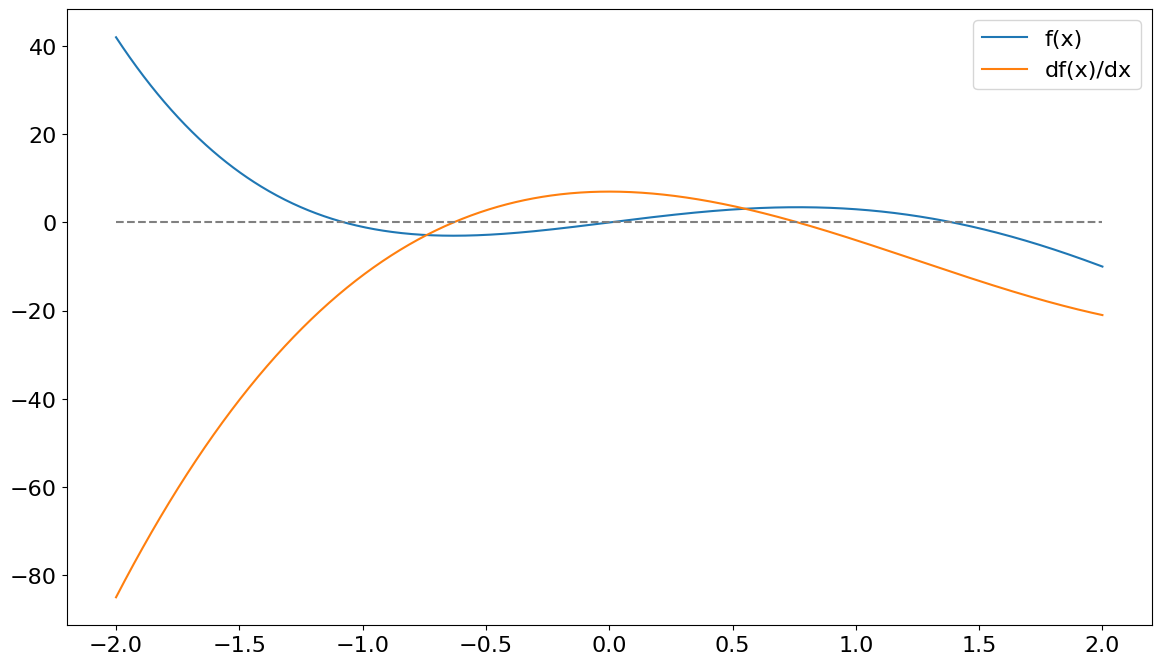

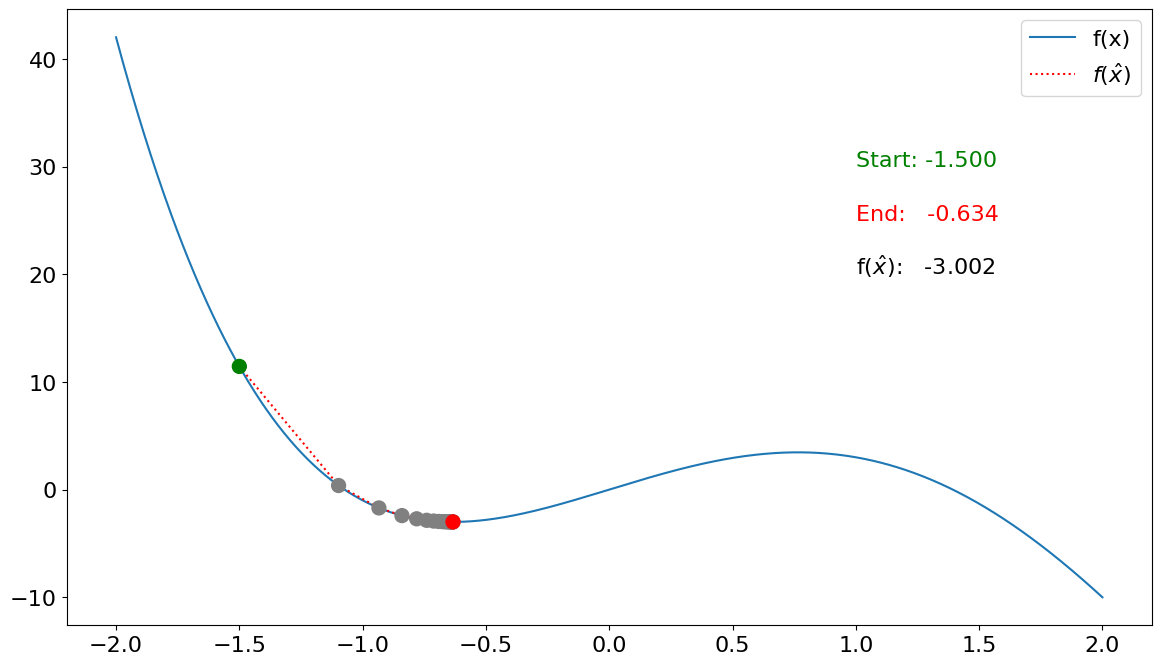

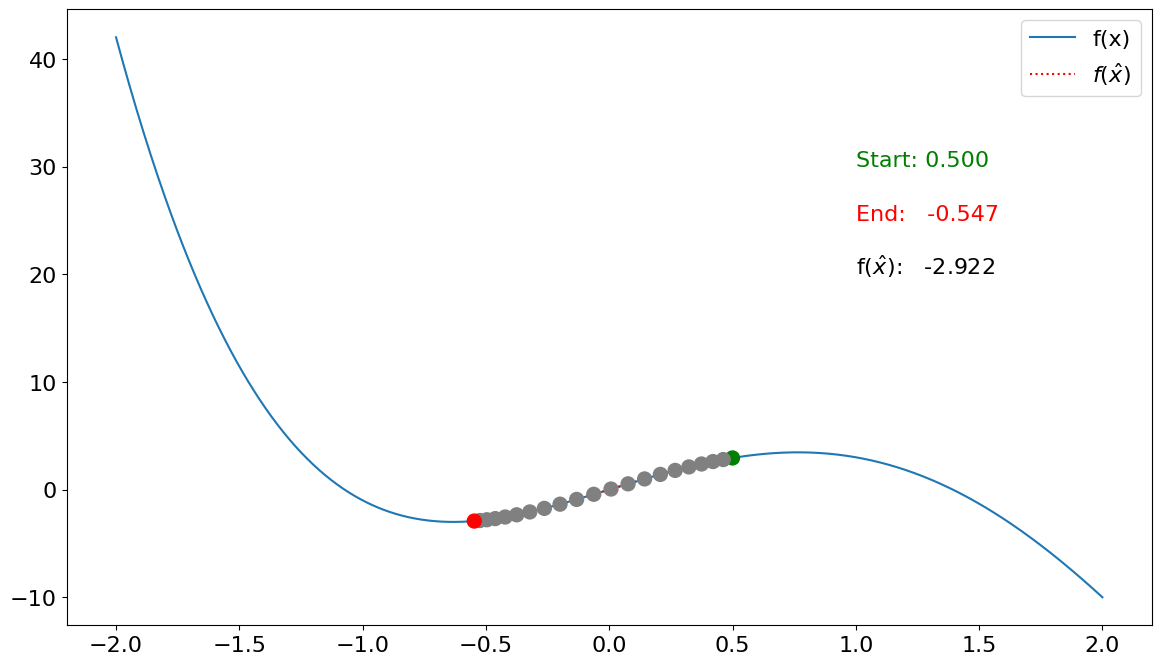

In [97]:
coefs = [0,7,0,-5,1]
npoints = 1001
x = np.linspace(-2, 2, npoints)

# Plot the function and derivative
fig, ax = plt.subplots(figsize=(14,8))
ax.plot(x, poly(coefs,x),label='f(x)')
ax.plot(x,poly_grad(coefs,x),label='df(x)/dx')
ax.plot(x,np.zeros(npoints),color = '0.5',linestyle='--')
ax.legend()

# Try a few different initializations
for x0 in [-1.5,0.5]:
    
    # Perform gradient descent
    xhat = grad_descent(coefs, step_size=0.01, iterations=20, x=x0)

    # Plot
    colors = ['green'] + ['gray'] * (len(xhat) - 2) + ['r']
    fig, ax = plt.subplots(figsize=(14,8))
    ax.plot(x, poly(coefs,x),label='f(x)')
    ax.plot(xhat, poly(coefs,xhat),c='r',linestyle=':',label='$f(\\hat x)$')
    ax.scatter(xhat, poly(coefs,xhat),c=colors,s=100, zorder=npoints+1)
    ax.text(1, 30, 'Start: {:.3f}'.format(xhat[0]), color='green')
    ax.text(1, 25, 'End:   {:.3f}'.format(xhat[-1]), color='red')
    ax.text(1, 20, 'f($\\hat x$):   {:.3f}'.format(poly(coefs,xhat[-1])), color='k')
    ax.legend()

## Question 2.4: Gradient Descent N-D
Assume a linear function: 

$$y=f(X,\beta) = \beta_1x_1+\beta_2x_2+...+\beta_nx_n=X\beta$$


Given $m$ pairs of $(X,y)$, use gradient descent to solve for $\beta$ that minimizes the squared residuals:

$$S(\beta)=(\boldsymbol{y}-\boldsymbol{X\beta})^T(\boldsymbol{y}-\boldsymbol{X\beta})$$

Recall that the gradient of $S$ is:

$$\nabla S(\beta)= 2\boldsymbol{X}^T(\boldsymbol{X\beta}-\boldsymbol{y})$$

In [137]:
def gradS(X,y,beta):
    """ Returns the gradient of S(beta), where S the sum of squared residuals 
        of the linear equation: y=X*beta
    
        Parameters
        ----------
        X :   numpy.ndarray
              X.shape must be (M,N)
              Each row of `X` is a single data point of dimension N
              Therefore `X` represents M data points

        y :   numpy.ndarray
              y.shape must be (M,)
              Each element of `y` is an output value such that y[i] ~ X[i]*beta

        beta :  numpy.ndarray
                beta.shape = (N,)

        
        Returns
        -------
        gS : numpy.ndarray
             The gradient of S evaluated at beta
             gS.shape = (N,)
        
        Notes
        -----
        You may find numpy.transpose() and numpy.dot() to be useful here.
        
        See:
            https://docs.scipy.org/doc/numpy/reference/generated/numpy.transpose.html
            https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html
        
    """
    return np.dot((2 * np.transpose(X)), (np.dot(X, beta) - y))

In [138]:
def gradS_des(X,y,beta0,step_size=0.001,iterations=20):
    """ Returns the estimated beta value by minimizing the squared residuals S of 
        a linear equation using gradient descent 
    
        Parameters
        ----------
        X :   numpy.ndarray
              X.shape must be (M,N)
              Each row of `X` is a single data point of dimension N
              Therefore `X` represents M data points

        y :   numpy.ndarray
              y.shape must be (M,)
              Each element of `y` is an output value such that y[i] ~ X[i]*beta

        beta0 : numpy.ndarray
                This is the initial guess for beta
                beta0.shape = (N,)
                
        step_size : Optional[float], default: 0.001
                    The magnitude of the step to take for each update of beta
            
        iterations : Optional[int], default: 20
                    After this number of iterations, the gradS_des function should return

        
        Returns
        -------
        beta :  numpy.ndarray
                This is the final estimate of beta after #iterations
                beta.shape = (N,)
                
        
        Notes
        -----
        Only return the final estimate of beta, not the estimates at each step like we did 
        for grad_descent() in Question 2.2 
    """
    beta_list = [beta0]
    for i in range(iterations):
      beta_old = beta_list[-1]
      grad = gradS(X, y, beta_old)
      beta_new = beta_old - step_size*grad
      beta_list.append(beta_new)

    return beta_list[-1]




In [139]:
# execute this cell to grade your work

from grader import test_gradS
test_gradS(gradS_des)


============================== ALL TESTS PASSED! ===============================
Your submission code: bwce7136c701950d9a399badb9a7d577be8502c858d5e6db0c1322b576


### Test it out on a toy example

In [ ]:

n = 10     # number of dimensions
m = 100     # number of data points

# Generate random X values between 0--10
X = np.random.rand(m,n)*10

# Generate random beta values between 0--1
b = np.random.rand(n,1)*5

# Generate Gaussian noise
eps = np.random.randn(m,1)

# This should call the function you created in Question 1.1
y = generate_linear_y(X,b) + eps

# Perform OLS by calling the function you created in Question 1.2
beta_ols = regression_ols(X, y)

# Perform gradient descent by calling the function you created in Question 2.4
beta_gd1 = gradS_des(X,y,beta0=b+np.random.randn(n,1),step_size=0.00001,iterations=50)
beta_gd2 = gradS_des(X,y,beta0=b+np.random.randn(n,1),step_size=0.00001,iterations=100)
beta_gd3 = gradS_des(X,y,beta0=b+np.random.randn(n,1),step_size=0.00001,iterations=150)

#### Plot $\beta$ (true) vs. $\hat\beta$ (estimated)

In [ ]:
bsort=np.sort(b,axis=0)

fig, ax = plt.subplots(figsize=(8,8))
ax.plot(bsort,bsort,color='0.75',linestyle='--')
ax.scatter(b,beta_gd1,label='$\\hat\\beta$ (GD,iter=50)')
ax.scatter(b,beta_gd2,label='$\\hat\\beta$ (GD,iter=100)')
ax.scatter(b,beta_gd3,label='$\\hat\\beta$ (GD,iter=150)')
ax.scatter(b,beta_ols,label='$\\hat\\beta$ (OLS)')
ax.set_xlabel('$\\beta$ (true)')
ax.set_ylabel('$\\hat\\beta$')
ax.legend()